In [37]:
import osmnx as ox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# osmnx.geometries.geometries_from_bbox(north, south, east, west, tags)
# https://www.mapsdirections.info/pt/coordenadas-gps.html
# ANALISANDO CIDADE DE PATOS - PB
north = -6.9875
west = -37.3303
south = -7.0882
east = -37.2215
pois = ox.geometries.geometries_from_bbox(north, south, east, west, tags={'amenity':True})
pois = pd.DataFrame(pois)
pois.reset_index(inplace=True)

In [56]:
pois.head()

,element_type,osmid,amenity,name,geometry,opening_hours,outdoor_seating,cuisine,atm,brand,...,note,park_ride,shelter,roof:height,roof:orientation,lit,source:name,ways,layer,type
0,node,1798496605,fuel,Posto Viola,POINT (-37.27847 -7.02390),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,1798496642,taxi,Moto táxi Praça dos Pombos,POINT (-37.27843 -7.02361),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,1798525769,taxi,Táxi Rodoviária Velha,POINT (-37.27735 -7.02265),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,1798525772,taxi,Táxi Fórum Miguel Sátiro,POINT (-37.27702 -7.02601),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,1798919196,bar,Bar do Rock,POINT (-37.27702 -7.02204),We-Su 19:00-02:00+; week 25-26 18:00-04:00,yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
geoms = ox.geometries.geometries_from_bbox(north, south, east, west, tags={'highway':True, 'place':True, 'name':True})
geoms = pd.DataFrame(geoms)
geoms.reset_index(inplace=True)

In [61]:
def is_street(string):
    string = str(string)
    return string.startswith('Rua') or string.startswith('Travessa') or string.startswith('Avenida')

ruas = geoms[geoms['name'].apply(is_street)==True]

In [83]:
ruas.head()

,element_type,osmid,geometry,highway,maxspeed,amenity,name,public_transport,source,IBGE:GEOCODIGO,...,depot:type,conveying,source:oneway,handrail,incline,footway,industrial,ways,type,border_type
1563,way,54690571,"LINESTRING (-37.29267 -7.03183, -37.29355 -7.0...",primary,50,NaN,Rua do Prado,NaN,IBGE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1564,way,61579255,"LINESTRING (-37.27112 -7.01758, -37.27074 -7.0...",secondary,NaN,NaN,Avenida Lima Campos,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1580,way,165774623,"LINESTRING (-37.30149 -7.00534, -37.30040 -7.0...",residential,NaN,NaN,Rua Severina Dantas,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1581,way,165774624,"LINESTRING (-37.30190 -7.00594, -37.30081 -7.0...",residential,NaN,NaN,Rua Iremar Belarmino,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1582,way,165774625,"LINESTRING (-37.30121 -7.00490, -37.30129 -7.0...",residential,NaN,NaN,Rua Antônio Crisanto Dantas,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
bairros = geoms.loc[(geoms['place'] == 'neighbourhood') | (geoms['place'] == 'suburb')]
bairros = bairros[bairros.geometry.apply(type).apply(str)=="<class 'shapely.geometry.polygon.Polygon'>"]

In [77]:
bairros.head()

,element_type,osmid,geometry,highway,maxspeed,amenity,name,public_transport,source,IBGE:GEOCODIGO,...,depot:type,conveying,source:oneway,handrail,incline,footway,industrial,ways,type,border_type
6189,relation,3819334,"POLYGON ((-37.28270 -7.05786, -37.28186 -7.057...",NaN,NaN,NaN,Santa Cecília,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[427104529, 171543543, 427104517, 171543546, 8...",boundary,NaN
6190,relation,4141969,"POLYGON ((-37.28372 -7.02427, -37.28268 -7.024...",NaN,NaN,NaN,Centro,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[528484442, 170491140, 525677008, 525677007, 5...",boundary,NaN
6191,relation,4485256,"POLYGON ((-37.28158 -7.05318, -37.28147 -7.052...",NaN,NaN,NaN,Jatobá,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[871208879, 871208878, 171543546, 427104517, 1...",boundary,NaN
6192,relation,4601772,"POLYGON ((-37.28307 -7.06504, -37.28304 -7.065...",NaN,NaN,NaN,Alto da Tubiba,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[169735160, 169734332, 427104540, 421411824, 3...",boundary,NaN
6193,relation,4601773,"POLYGON ((-37.26246 -7.01933, -37.26219 -7.019...",NaN,NaN,NaN,Ana Leite,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[435034545, 435034543, 435034547, 277363873, 3...",boundary,NaN


In [79]:
pois = pois[['amenity', 'name', 'geometry', 'opening_hours']]
pois.head()

,amenity,name,geometry,opening_hours
0,fuel,Posto Viola,POINT (-37.27847 -7.02390),NaN
1,taxi,Moto táxi Praça dos Pombos,POINT (-37.27843 -7.02361),NaN
2,taxi,Táxi Rodoviária Velha,POINT (-37.27735 -7.02265),NaN
3,taxi,Táxi Fórum Miguel Sátiro,POINT (-37.27702 -7.02601),NaN
4,bar,Bar do Rock,POINT (-37.27702 -7.02204),We-Su 19:00-02:00+; week 25-26 18:00-04:00


In [80]:
pois.amenity.value_counts().shape

(60,)

In [7]:
G = ox.graph_from_place('Centro, Patos, Paraíba, Brazil', network_type='drive')
G = ox.project_graph(G)

C:\Users\Vinicius32\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


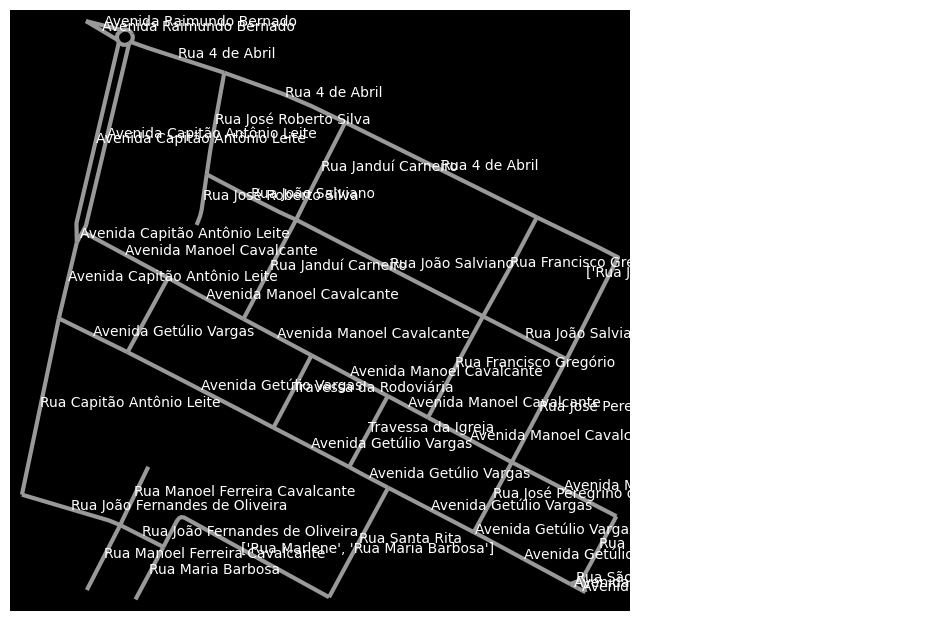

In [8]:
import matplotlib.pyplot as plt
import osmnx as ox
ox.config(use_cache=True, log_console=True)

G = ox.graph_from_address('Centro, Patos, Paraíba, Brazil', dist=200, network_type='drive')
G = ox.get_undirected(G)

fig, ax = ox.plot_graph(G, bgcolor='k', edge_linewidth=3, node_size=0,
                        show=False, close=False)
for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna('').iterrows():
    c = edge['geometry'].centroid
    text = edge['name']
    ax.annotate(text, (c.x, c.y), c='w')
plt.show()

# python MY_SCRIPT.py >/dev/null &

In [14]:
!pip install overpy

     ---------------------------------------- 47.9/47.9 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for overpy: started
  Running setup.py install for overpy: finished with status 'done'


  DEPRECATION: overpy is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x239c3ec8ee0>
sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x239c3ec8f40>
C:\Users\Vinicius32\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\Users\Vinicius32\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed fil

In [84]:
from shapely.geometry import Point, LineString

In [87]:
nodes = [Point(1, 1), Point(0, 1)]
linestring = LineString([(0, 0), (0, 2)])
on_line = [node for node in nodes if node.distance(linestring) == 0.0]
on_line

[<POINT (0 1)>]